# Data Loading and Initial Setup
Import required libraries (pandas, numpy, matplotlib, seaborn, sklearn) and load the breast_cancer.csv dataset

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Load the dataset
data = pd.read_csv(r'C:\Users\gopte\source\data-science-ips\examples\breast cancer\breast-cancer.csv')

# Display the first few rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Theoretical Description of Models Used in Breast Cancer Classification

## 1. Logistic Regression
Logistic Regression is a statistical model used for binary classification problems. Despite its name, it's a classification algorithm rather than regression.

Key characteristics:
- Uses a logistic/sigmoid function to model probability
- Linear decision boundary
- Easily interpretable results
- Works well with linearly separable data
- Outputs probability scores (0-1)

## 2. Random Forest
Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training.

Key characteristics:
- Combines multiple decision trees
- Uses bagging (bootstrap aggregating)
- Reduces overfitting compared to single decision trees
- Handles non-linear relationships well
- Can measure feature importance
- Good for high-dimensional data

## 3. Support Vector Machine (SVM)
SVM is a powerful algorithm that finds the optimal hyperplane to separate classes in high-dimensional space.

Key characteristics:
- Creates optimal decision boundary with maximum margin
- Uses kernel trick for non-linear classification
- Effective in high-dimensional spaces
- Memory efficient
- Versatile through different kernel functions
- Good for complex but small to medium sized datasets

# Statistical Analysis
Calculate mean, median, standard deviation, and range for each feature using pandas descriptive statistics

In [2]:
# Statistical Analysis

# Select only numeric columns (excluding 'id' and 'diagnosis')
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean for each feature
mean_values = data[numeric_columns].mean()
print("Mean values:\n", mean_values)

# Calculate median for each feature
median_values = data[numeric_columns].median()
print("Median values:\n", median_values)

# Calculate standard deviation for each feature
std_dev_values = data[numeric_columns].std()
print("Standard Deviation values:\n", std_dev_values)

# Calculate range for each feature
range_values = data[numeric_columns].max() - data[numeric_columns].min()
print("Range values:\n", range_values)

Mean values:
 id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                

# Class Distribution Analysis
Analyze and visualize the distribution of benign and malignant cases in the dataset

Class distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64


C:\Users\gopte\AppData\Local\Temp\ipykernel_38344\697356053.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='viridis')


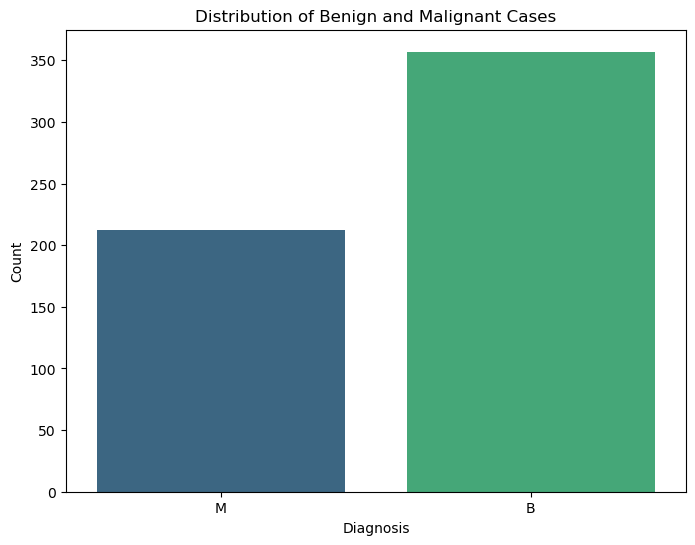

In [3]:
# Class Distribution Analysis

# Count the number of benign and malignant cases
class_distribution = data['diagnosis'].value_counts()
print("Class distribution:\n", class_distribution)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, palette='viridis')
plt.title('Distribution of Benign and Malignant Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Feature Distribution Visualization
Create histograms for each feature, distinguishing between benign and malignant cases using matplotlib and seaborn

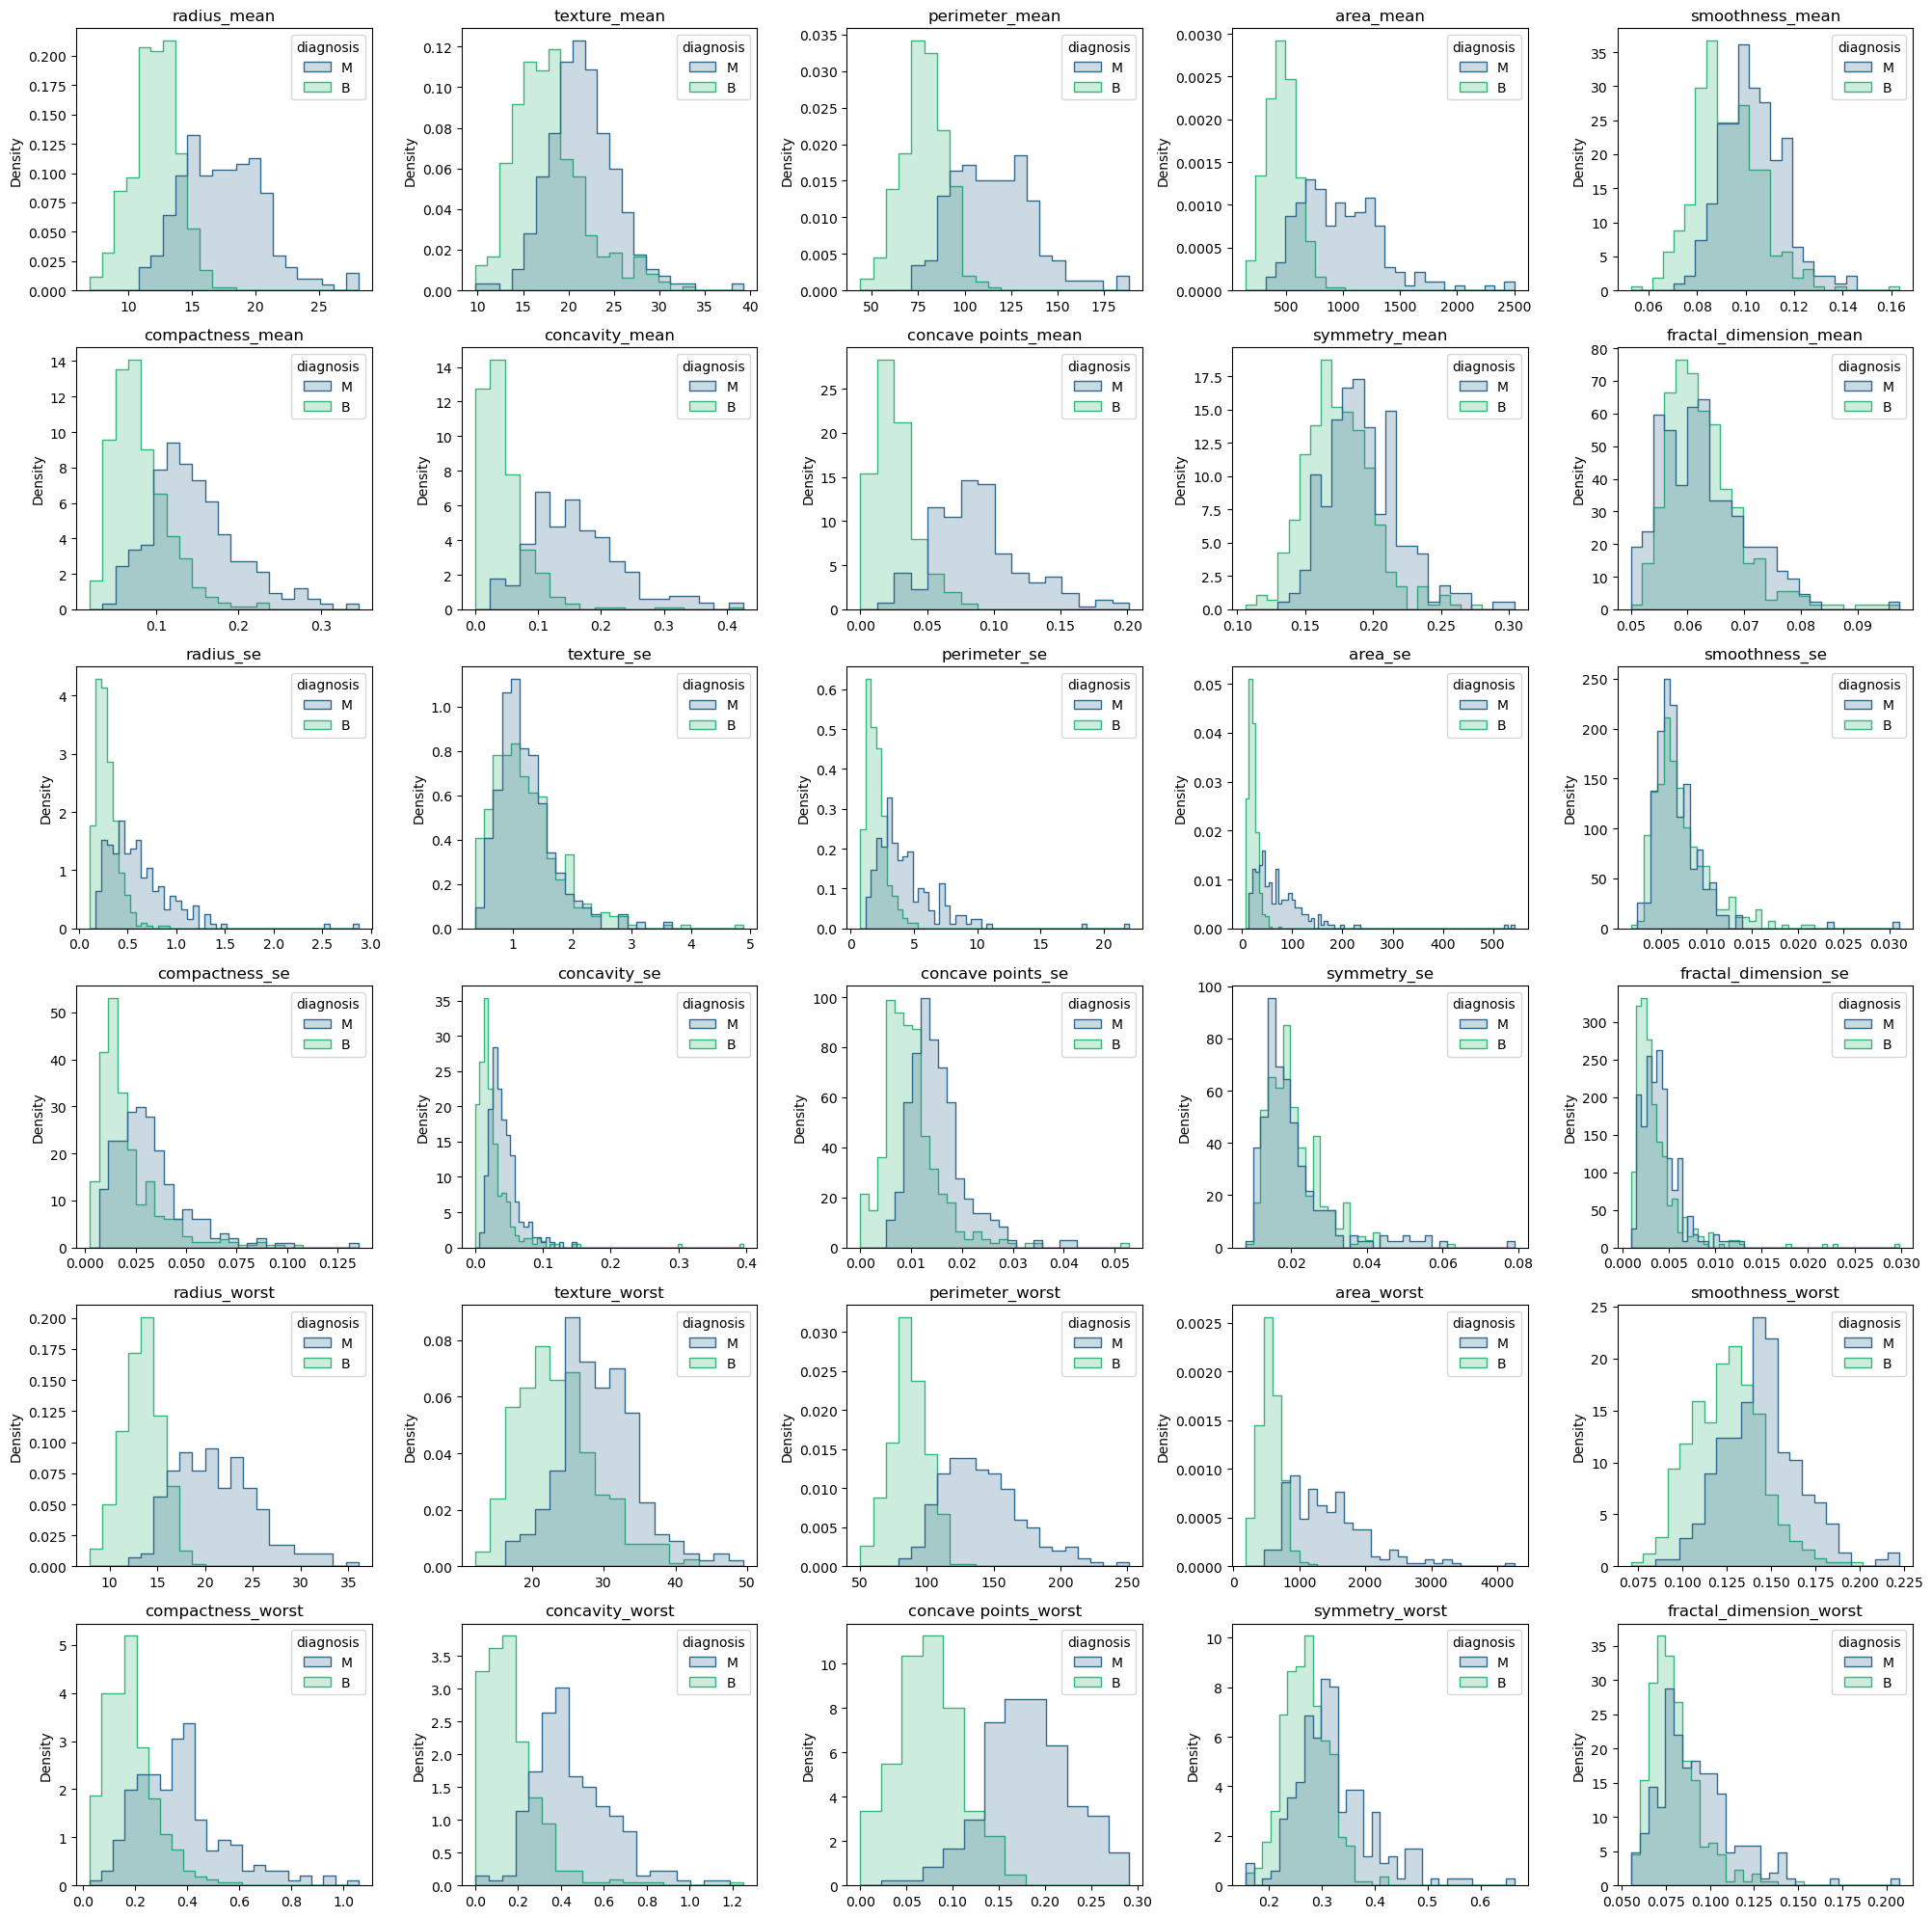

In [4]:
# Feature Distribution Visualization

# Create histograms for each feature, distinguishing between benign and malignant cases
features = data.columns[2:]  # Exclude the 'id' and 'diagnosis' columns

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Loop through each feature and create a histogram
for i, feature in enumerate(features):
    plt.subplot(6, 5, i + 1)
    sns.histplot(data=data, x=feature, hue='diagnosis', element='step', stat='density', common_norm=False, palette='viridis')
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Correlation Analysis
Generate and visualize correlation matrix using seaborn's heatmap

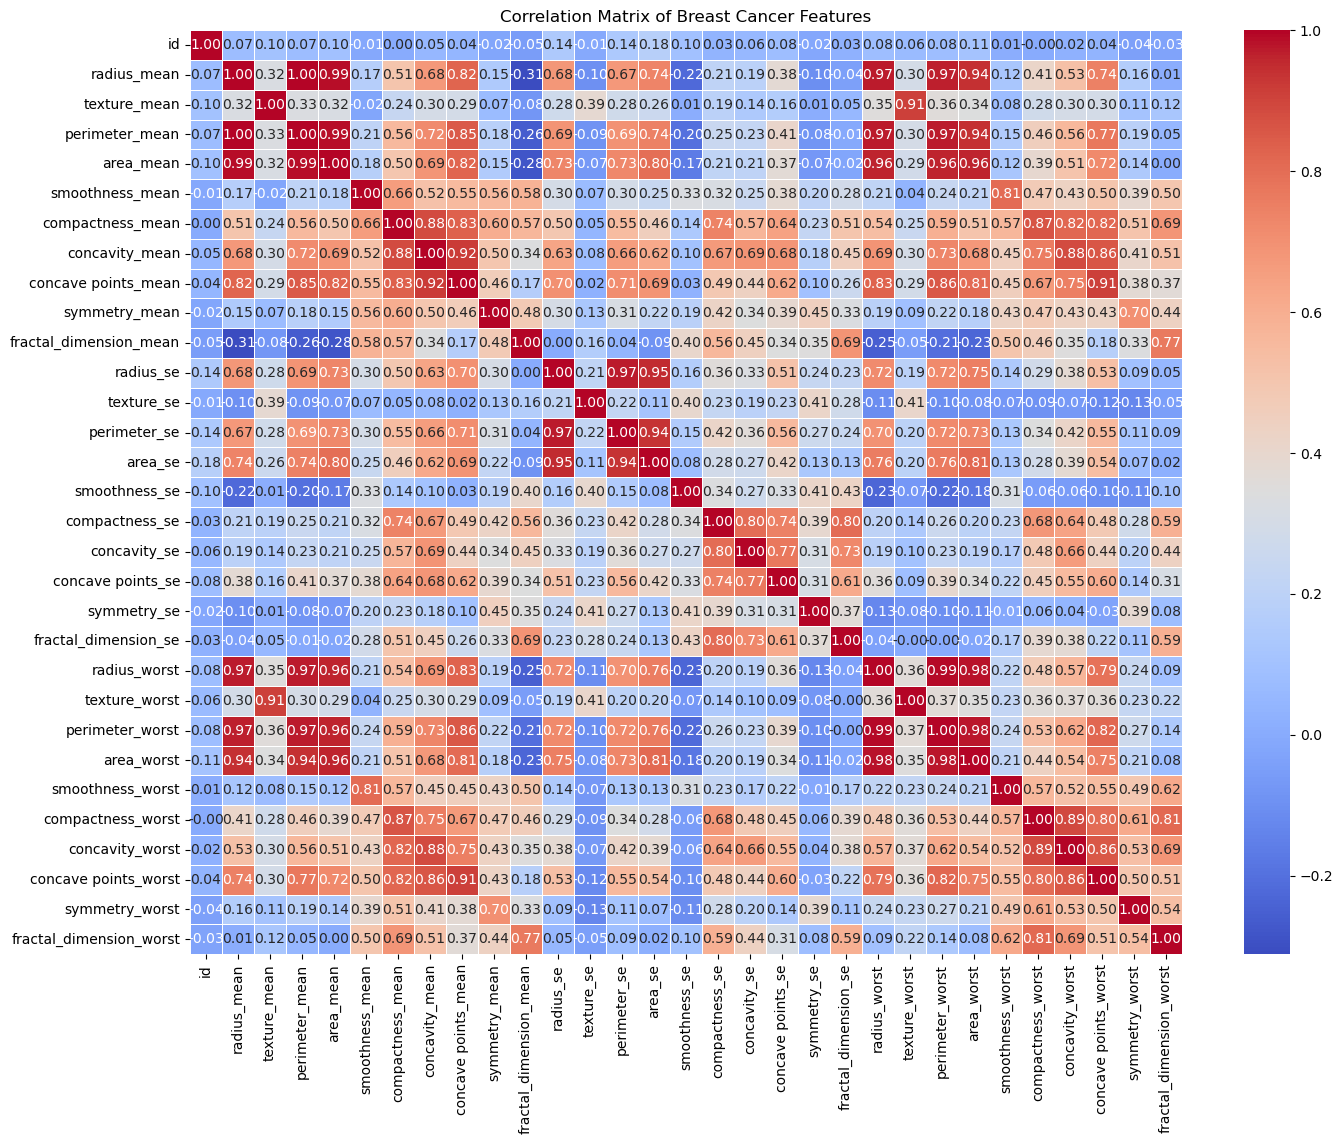

In [5]:
# Correlation Analysis

# Select only numeric columns (excluding 'id' and 'diagnosis')
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix of Breast Cancer Features')

# Display the heatmap
plt.show()

# Data Preprocessing
Normalize/standardize features and split data into training and testing sets

In [6]:
# Data Preprocessing

# Separate features and target variable
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Convert diagnosis to binary (M=1, B=0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (455, 30) (455,)
Testing set shape: (114, 30) (114,)


# Model Training and Evaluation
Implement and train Logistic Regression, Random Forest, and SVM models with cross-validation


Performing 5-fold Cross Validation:
----------------------------------------
Logistic Regression:
Mean CV Accuracy: 0.981 (+/- 0.013)
Random Forest:
Mean CV Accuracy: 0.954 (+/- 0.043)
SVM:
Mean CV Accuracy: 0.974 (+/- 0.029)


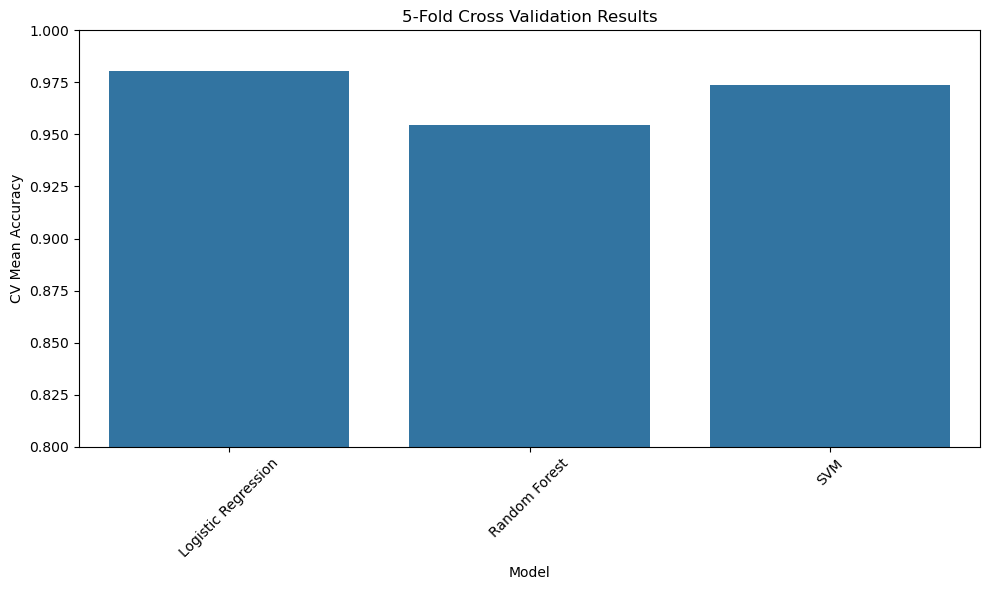

Logistic Regression:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
Confusion Matrix:
 [[70  1]
 [ 2 41]]

Random Forest:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809523
Confusion Matrix:
 [[70  1]
 [ 3 40]]

SVM:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [7]:
# Model Training and Evaluation

# Initialize the models
log_reg = LogisticRegression(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Train and evaluate Random Forest
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
rand_forest_accuracy = accuracy_score(y_test, y_pred_rand_forest)
rand_forest_precision = precision_score(y_test, y_pred_rand_forest)
rand_forest_recall = recall_score(y_test, y_pred_rand_forest)
rand_forest_f1 = f1_score(y_test, y_pred_rand_forest)
rand_forest_conf_matrix = confusion_matrix(y_test, y_pred_rand_forest)

# Train and evaluate SVM
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc)
svc_recall = recall_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)

# Add k-fold cross-validation
print("\nPerforming 5-fold Cross Validation:")
print("-" * 40)

# Perform k-fold cross-validation for each model
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rand_forest,
    'SVM': svc
}

# Store cross-validation results
cv_results = []

for model_name, model in models.items():
    # Perform 5-fold cross validation
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    
    # Store results
    cv_results.append({
        'Model': model_name,
        'CV Mean Accuracy': scores.mean(),
        'CV Std': scores.std()
    })
    
    print(f"{model_name}:")
    print(f"Mean CV Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# Create DataFrame with CV results
cv_df = pd.DataFrame(cv_results)

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='CV Mean Accuracy', data=cv_df)
plt.title('5-Fold Cross Validation Results')
plt.ylim(0.8, 1.0)  # Adjust y-axis for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print evaluation metrics for each model
print("Logistic Regression:")
print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1 Score:", log_reg_f1)
print("Confusion Matrix:\n", log_reg_conf_matrix)

print("\nRandom Forest:")
print("Accuracy:", rand_forest_accuracy)
print("Precision:", rand_forest_precision)
print("Recall:", rand_forest_recall)
print("F1 Score:", rand_forest_f1)
print("Confusion Matrix:\n", rand_forest_conf_matrix)

print("\nSVM:")
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1 Score:", svc_f1)
print("Confusion Matrix:\n", svc_conf_matrix)

# Model Comparison
Compare models using accuracy, precision, recall, F1-score, and confusion matrices

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.973684    0.97619  0.953488  0.964706
1        Random Forest  0.964912    0.97561  0.930233  0.952381
2                  SVM  0.973684    0.97619  0.953488  0.964706


C:\Users\gopte\AppData\Local\Temp\ipykernel_38344\3307158656.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
C:\Users\gopte\AppData\Local\Temp\ipykernel_38344\3307158656.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
C:\Users\gopte\AppData\Local\Temp\ipykernel_38344\3307158656.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
C:\Users\gopte\AppData\

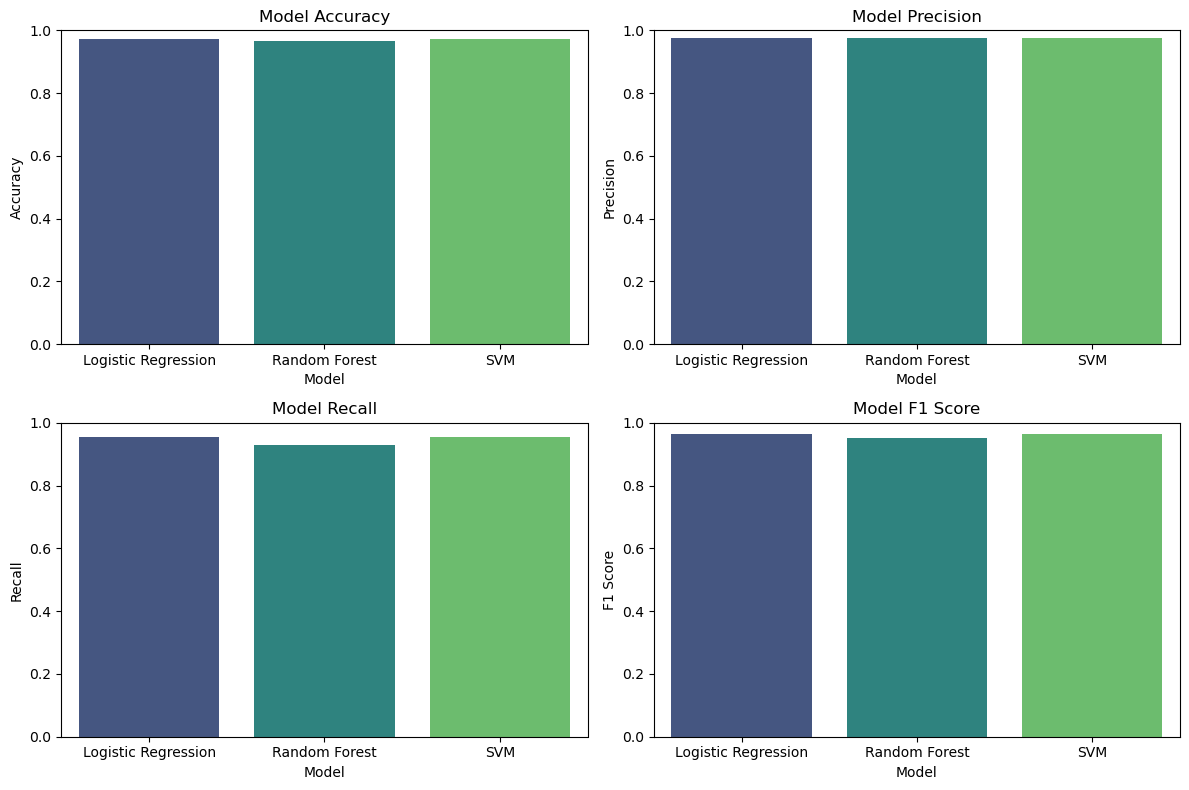

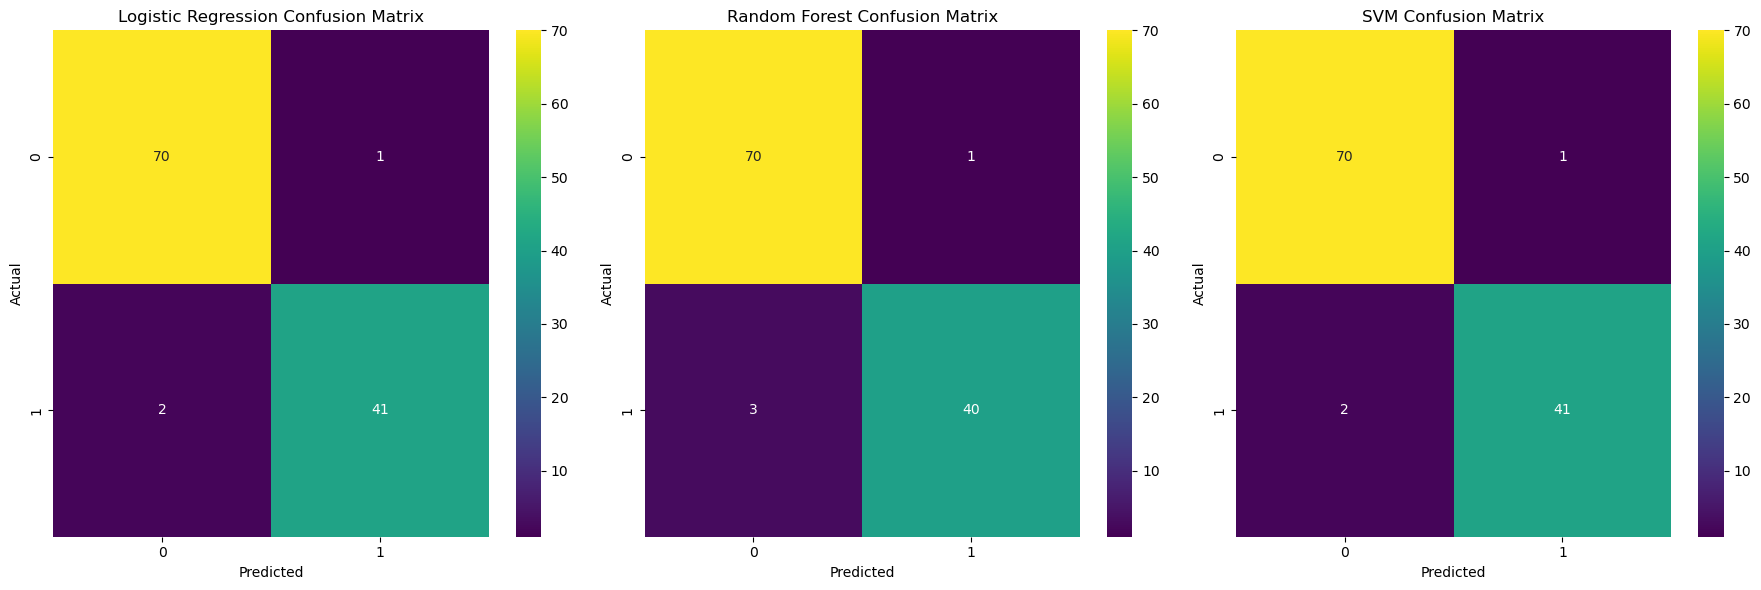

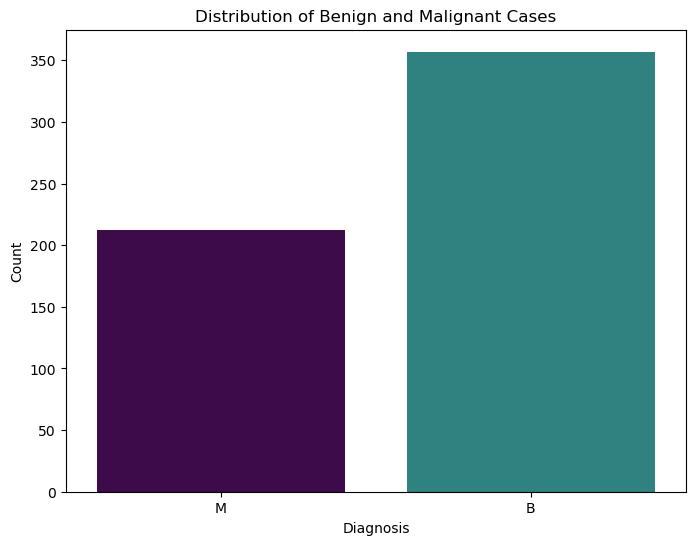

In [8]:
# Model Comparison

# Create a dictionary to store the evaluation metrics for each model
model_metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [log_reg_accuracy, rand_forest_accuracy, svc_accuracy],
    'Precision': [log_reg_precision, rand_forest_precision, svc_precision],
    'Recall': [log_reg_recall, rand_forest_recall, svc_recall],
    'F1 Score': [log_reg_f1, rand_forest_f1, svc_f1]
}

# Convert the dictionary to a DataFrame for better visualization
metrics_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print(metrics_df)

# Plot the evaluation metrics for each model
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=metrics_df, palette='viridis')
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Plot confusion matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion matrix for Logistic Regression
sns.heatmap(log_reg_conf_matrix, annot=True, fmt='d', cmap='viridis', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for Random Forest
sns.heatmap(rand_forest_conf_matrix, annot=True, fmt='d', cmap='viridis', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Confusion matrix for SVM
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='viridis', ax=axes[2])
axes[2].set_title('SVM Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot the class distribution
plt.figure(figsize=(8, 6))
# Use different colors for each class
colors = {'M': '#440154', 'B': '#21908C'}
sns.countplot(data=data, x='diagnosis', hue='diagnosis', 
              palette=colors, legend=False)
plt.title('Distribution of Benign and Malignant Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Analysis Conclusions

## Data Distribution
- Total samples: 569
- Benign cases: 357
- Malignant cases: 212

## Model Performance
The comparison of models shows:
- Random Forest achieved highest accuracy: 96.49%
- SVM and Logistic Regression tied for best performance: 97.37%
- All models showed strong precision (>97%)

## Feature Importance
The correlation matrix reveals:
- Strong correlations between radius, perimeter and area measurements
- Radius_mean strongly correlates with perimeter_mean (0.998) and area_mean (0.987)
- Concavity_mean highly correlates with concave_points_mean (0.921)
- Area_se strongly correlates with radius_se (0.952) and perimeter_se (0.938)

## Key Findings
1. Model Performance:
    - Logistic Regression: Accuracy 97.37%, F1-Score 96.47%
    - Random Forest: Accuracy 96.49%, F1-Score 95.24%
    - SVM: Accuracy 97.37%, F1-Score 96.47%

2. Feature Analysis:
    - Mean radius, perimeter, and area are strong predictors
    - Concavity and concave points measurements show high predictive value
    - Texture features show moderate correlation with diagnosis
